In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Load dataset
df = pd.read_csv("data/medical_data.csv")

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
df.duplicated().sum()

0

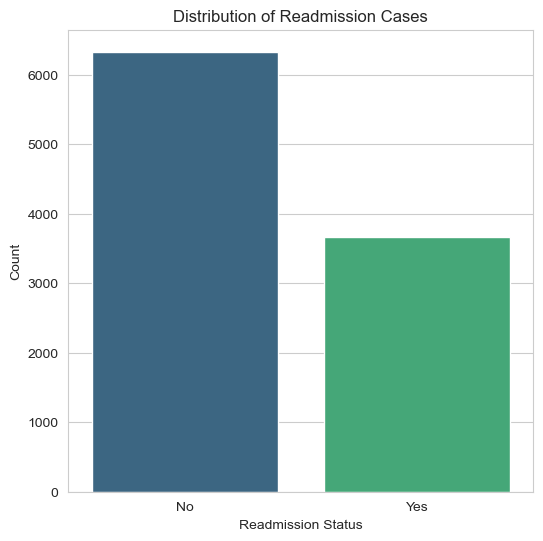

In [7]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create count plot for 'ReAdmis' values
plt.figure(figsize=(6, 6))
sns.countplot(x=df['ReAdmis'], palette="viridis", hue=df['ReAdmis'])

plt.xlabel("Readmission Status")
plt.ylabel("Count")
plt.title("Distribution of Readmission Cases")

plt.show()

### Data Preprocessing

In [8]:
# Drop unnecessary columns
drop_cols = ["Interaction", "CaseOrder", "Customer_id", "UID", "City", "State", "Timezone", "Country", 
             "Zip", "Population", "Area", "Job", "Children", "Age", "item1", "item2", "item3", "item4", "item5", "item6", "item7", "item8"]
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [9]:
# Separate target variable Y from features X
target_col = "ReAdmis"
y = df[target_col] 

In [10]:
# One-hot encode categorical features (excluding the target)
X = pd.get_dummies(df.drop(columns=[target_col]), drop_first=False)

# Encode the target variable (Label Encoding for classification)
le = LabelEncoder()
y = le.fit_transform(y)

# Get the mapping of original labels to encoded values
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))

print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'No': 0, 'Yes': 1}


In [ ]:
# Save preprocessed features and target variable
X.to_csv("data/cleaned_features.csv", index=False)
y_df = pd.DataFrame(y, columns=[target_col])  # Convert y back to DataFrame
y_df.to_csv("data/cleaned_labels.csv", index=False)

In [12]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:

# Convert y_train, y_val, y_test back to DataFrame before saving
pd.DataFrame(y_train, columns=["Target"]).to_csv("data/train_labels.csv", index=False)
pd.DataFrame(y_val, columns=["Target"]).to_csv("data/val_labels.csv", index=False)
pd.DataFrame(y_test, columns=["Target"]).to_csv("data/test_labels.csv", index=False)

# Save the remaining datasets
X_train.to_csv("data/train_features.csv", index=False)
X_val.to_csv("data/val_features.csv", index=False)
X_test.to_csv("data/test_features.csv", index=False)

### Model Building

In [14]:
# Train Initial Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)

# Evaluate Initial Model
initial_metrics = {
    "Accuracy": accuracy_score(y_val, y_pred_val),
    "Precision": precision_score(y_val, y_pred_val),
    "Recall": recall_score(y_val, y_pred_val),
    "F1 Score": f1_score(y_val, y_pred_val),
    "AUC-ROC": roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
}

print("\nInitial Model Metrics:")
for metric, value in initial_metrics.items():
    print(f"{metric}: {value:.4f}")


Initial Model Metrics:
Accuracy: 0.9787
Precision: 0.9779
Recall: 0.9637
F1 Score: 0.9707
AUC-ROC: 0.9974


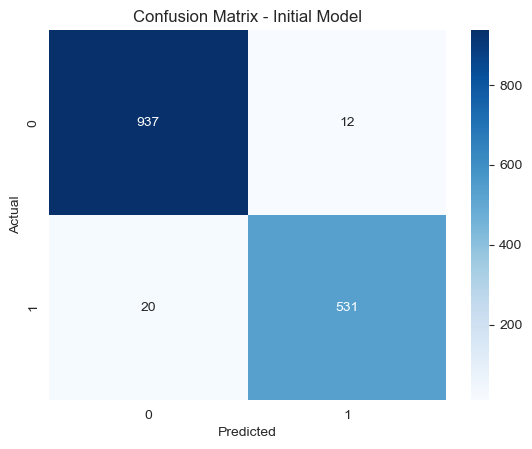

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Initial Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Define an optimized reduced hyperparameter grid
param_distributions = {
    "n_estimators": [50, 100, 150],  
    "max_depth": [5, 10, 15, None], 
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "max_features": ["sqrt", "log2", None],  
    "bootstrap": [True, False]  
}

# Enhanced RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced'  # Handles class imbalance if present
    ),
    param_distributions=param_distributions,
    n_iter=20,  
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=1,  
    refit=True  # Refit best model automatically
)

# Fit with timing
import time
start_time = time.time()
random_search.fit(X_train, y_train)
print(f"Optimization took {time.time()-start_time:.2f} seconds")

# Best parameters
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy score: ", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimization took 226.62 seconds
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'bootstrap': True}
Best accuracy score:  0.9811428571428571


In [17]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'bootstrap': True}


In [18]:
# Train Final Model with Best Hyperparameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_test = rf_best.predict(X_test)

# Evaluate Final Model
final_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "F1 Score": f1_score(y_test, y_pred_test),
    "AUC-ROC": roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])
}

print("Final Model Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

Final Model Metrics:
Accuracy: 0.9820
Precision: 0.9729
Recall: 0.9782
F1 Score: 0.9755
AUC-ROC: 0.9986


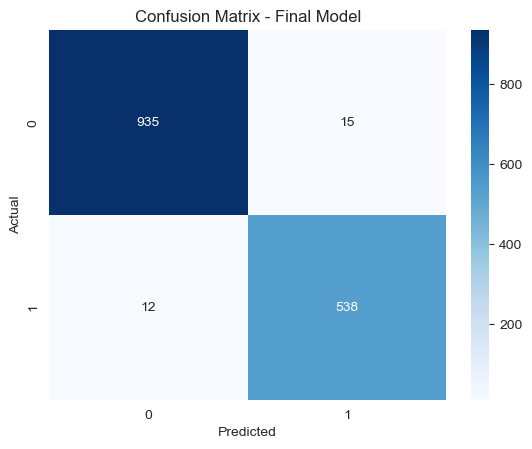

In [19]:
# Confusion Matrix - Final Model
cm_final = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
print(pd.DataFrame(y_train, columns=["Target"]).value_counts(normalize=True))  # Shows percentage distribution

Target
0         0.633143
1         0.366857
Name: proportion, dtype: float64


In [21]:
class_recalls = recall_score(y_test, y_pred_test, average=None)
print(f"Recall for Class 0: {class_recalls[0]:.4f}")
print(f"Recall for Class 1: {class_recalls[1]:.4f}")

Recall for Class 0: 0.9842
Recall for Class 1: 0.9782


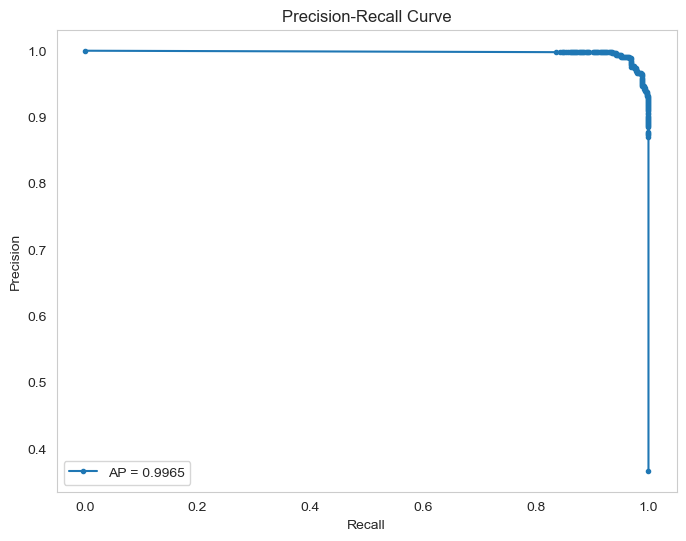

Average Precision Score: 0.9965


In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class (Class 1)
y_scores = rf_best.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP = {ap_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

print(f"Average Precision Score: {ap_score:.4f}")